## Métricas para modelos de Recomendação

As métricas são importantes no uso de modelos de recomendação porque elas ajudam a avaliar e comparar a performance do modelo. Algumas das métricas mais comuns incluem:

 - Acurácia: mede a proporção de recomendações corretas feitas pelo modelo.

- Precisão: mede a proporção de recomendações corretas em relação ao total de recomendações feitas pelo modelo.

- Recall: mede a proporção de recomendações corretas em relação ao total de itens relevantes.

- F1-score: é uma métrica combinada da precisão e recall.

- Medida de cobertura: mede a proporção de itens relevantes que foram recomendados pelo modelo.

- Medida de diversidade: mede a variedade de itens diferentes recomendados pelo modelo.

- Medida de novidade: mede a proporção de itens recomendados que são novos ou pouco populares.

- Medida de serendipidade: mede a probabilidade de um usuário gostar de um item recomendado que ele não esperava.

- RMSE: mede o erro quadrático médio entre as recomendações do modelo e os valores reais de avaliação de usuários.

Cada um desses métricas é importante para avaliar diferentes aspectos da performance do modelo e ajudar a avaliar quais abordagens são as mais eficazes.

In [ ]:
!pip install scikit-surprise -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!python -m pip uninstall matplotlib -y -q 
!pip install matplotlib==3.1.3 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
recmetrics 0.1.5 requires matplotlib<4.0.0,>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
!pip install recmetrics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.8/793.8 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.8/227.8 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
import recmetrics

In [ ]:
#Importando Dataset
ratings = pd.read_csv("/content/drive/MyDrive/recomendacao/ratings_small.csv")

In [ ]:
#Limitando o conjunto de ratings
ratings = ratings.query("rating >=3")

In [ ]:
ratings.reset_index(drop=True, inplace=True)

In [ ]:
#Iremos apenas considerar avaliações de usuários que avaliaram uma certa quantidade de Filmes
n=50
users = ratings["userId"].value_counts()
users = users[users>n].index.tolist()

In [ ]:
#Iremos passar apenas os usuários que filtramos acima
ratings = ratings.query('userId in @users')

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings.shape

(93462, 4)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


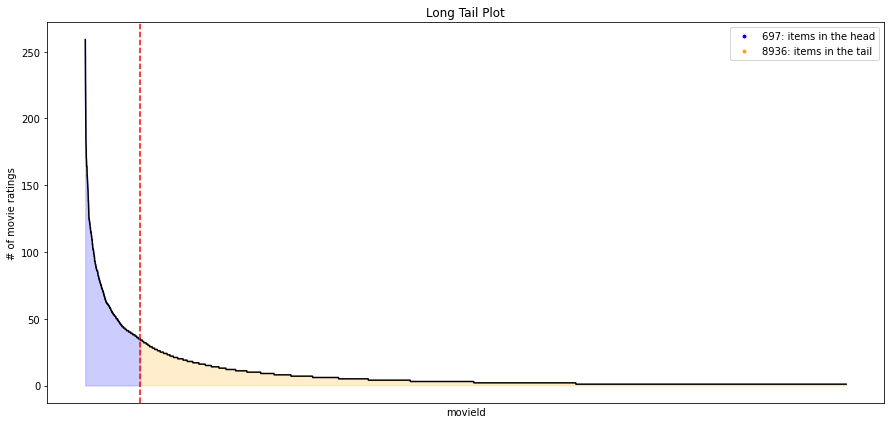

In [ ]:
fig = plt.figure(figsize=(15, 7))
recmetrics.long_tail_plot(df=ratings, 
             item_id_column="movieId", 
             interaction_type="movie ratings", 
             percentage=0.5,
             x_labels=False)

## Criando um Recomendador de Filtragem Colaborativa

A ideia é entender como essas métricas funcionam, para isso, iremos criar um recomendador simples com surprise, apenas para aplicar as métricas.

In [ ]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

In [ ]:
algo = SVD()
algo.fit(trainset)

In [ ]:
test = algo.test(testset)
test = pd.DataFrame(test)

In [ ]:
test.head()

,uid,iid,r_ui,est,details
0,288,1665,3.0,2.646950,{'was_impossible': False}
1,382,5574,3.5,3.240906,{'was_impossible': False}
2,411,158,3.0,2.808526,{'was_impossible': False}
3,514,1407,3.0,2.946892,{'was_impossible': False}
4,132,539,3.0,3.161155,{'was_impossible': False}


In [ ]:
test.drop("details", inplace=True, axis=1)
test.columns = ['userId', 'movieId', 'actual', 'cf_predictions']
test.head()

,userId,movieId,actual,cf_predictions
0,288,1665,3.0,2.646950
1,382,5574,3.5,3.240906
2,411,158,3.0,2.808526
3,514,1407,3.0,2.946892
4,132,539,3.0,3.161155


In [ ]:
#Olhando para RMSE e MSE
print("MSE: ", recmetrics.mse(test.actual, test.cf_predictions))
print("RMSE: ", recmetrics.rmse(test.actual, test.cf_predictions))

MSE:  0.7651289972044488
RMSE:  0.8747165239118607


In [ ]:
#criar modelo (matriz de valores previstos)
cf_model = test.pivot_table(index='userId', columns='movieId', values='cf_predictions').fillna(0)

In [ ]:
cf_model

movieId,1,2,3,5,6,7,8,10,11,12,...,185029,185033,185435,187593,187595,188833,189333,189381,193579,193585
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,4.348866,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,3.370081,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,3.827062,0.000000,0.000000,0.0,0.0,3.218418,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,4.127003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def get_users_predictions(user_id, n, model):
    recommended_items = pd.DataFrame(model.loc[user_id])
    recommended_items.columns = ["predicted_rating"]
    recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)    
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

In [ ]:
#get example prediction
get_users_predictions(4, 10, cf_model)

[296, 902, 2174, 908, 1967, 1704, 4896, 919, 4967, 4144]

In [ ]:
#iremos criar um dataframe com os itens que o cliente realmente viu
test = test.copy().groupby('userId', as_index=False)['movieId'].agg({'actual': (lambda x: list(set(x)))})

In [ ]:
test.head()

In [ ]:
test = test.set_index("userId")

In [ ]:
# fazer recomendações para todos os membros nos dados de teste
#iremos apenas criar uma tabela contendo ambas as listas que vimos acima
cf_recs = [] = []
for user in test.index:
    cf_predictions = get_users_predictions(user, 10, cf_model)
    cf_recs.append(cf_predictions)
        
test['SVD'] = cf_recs
test.head()

,actual,SVD
userId,,
1,"[2048, 1408, 2944, 3, 260, 1920, 1030, 1927, 1...","[2571, 110, 2761, 1197, 3578, 260, 1210, 2991,..."
4,"[1025, 898, 1923, 902, 3591, 3079, 1288, 3851,...","[296, 902, 2174, 908, 1967, 1704, 4896, 919, 4..."
6,"[2, 258, 515, 765, 265, 140, 270, 15, 16, 271,...","[595, 497, 593, 17, 86, 589, 480, 16, 281, 474]"
7,"[4993, 33794, 4995, 8965, 4874, 6539, 34319, 4...","[4993, 1208, 33794, 6539, 593, 4995, 2324, 356..."
10,"[7169, 4995, 107141, 112006, 8969, 72330, 2959...","[2959, 2762, 2858, 69844, 4995, 107141, 5952, ..."


## Recomendador por Popularidade

Iremos criar uma recomendador que recomenda os itens mais populares e iremos adicionar a nossa tabela de teste

In [ ]:
#Fazendo recomendação por popularidade para todos os usuários
popularity_recs = ratings.movieId.value_counts().head(10).index.tolist()

pop_recs = []
for user in test.index:
    pop_predictions = popularity_recs
    pop_recs.append(pop_predictions)
        
test['pop_predictions'] = pop_recs
test.head()

,actual,SVD,pop_predictions
userId,,,
1,"[2048, 1408, 2944, 3, 260, 1920, 1030, 1927, 1...","[2571, 110, 2761, 1197, 3578, 260, 1210, 2991,...","[356, 296, 318, 2571, 593, 260, 480, 1196, 295..."
4,"[1025, 898, 1923, 902, 3591, 3079, 1288, 3851,...","[296, 902, 2174, 908, 1967, 1704, 4896, 919, 4...","[356, 296, 318, 2571, 593, 260, 480, 1196, 295..."
6,"[2, 258, 515, 765, 265, 140, 270, 15, 16, 271,...","[595, 497, 593, 17, 86, 589, 480, 16, 281, 474]","[356, 296, 318, 2571, 593, 260, 480, 1196, 295..."
7,"[4993, 33794, 4995, 8965, 4874, 6539, 34319, 4...","[4993, 1208, 33794, 6539, 593, 4995, 2324, 356...","[356, 296, 318, 2571, 593, 260, 480, 1196, 295..."
10,"[7169, 4995, 107141, 112006, 8969, 72330, 2959...","[2959, 2762, 2858, 69844, 4995, 107141, 5952, ...","[356, 296, 318, 2571, 593, 260, 480, 1196, 295..."


## Recomendação Aleatória

riando um recomendador aleatório simples para demonstrar métricas de recomendação em ação. O recomendador aleatório simplesmente recomenda 10 filmes aleatórios para cada usuário.

In [ ]:
ran_recs = []
for user in test.index:
    random_predictions = ratings.movieId.sample(10).values.tolist()
    ran_recs.append(random_predictions)
        
test['random_predictions'] = ran_recs
test.head()

,actual,SVD,pop_predictions,random_predictions
userId,,,,
1,"[2048, 1408, 2944, 3, 260, 1920, 1030, 1927, 1...","[2571, 110, 2761, 1197, 3578, 260, 1210, 2991,...","[356, 296, 318, 2571, 593, 260, 480, 1196, 295...","[62956, 66509, 50872, 99030, 2110, 315, 2167, ..."
4,"[1025, 898, 1923, 902, 3591, 3079, 1288, 3851,...","[296, 902, 2174, 908, 1967, 1704, 4896, 919, 4...","[356, 296, 318, 2571, 593, 260, 480, 1196, 295...","[318, 3386, 5502, 2915, 136800, 2302, 95761, 7..."
6,"[2, 258, 515, 765, 265, 140, 270, 15, 16, 271,...","[595, 497, 593, 17, 86, 589, 480, 16, 281, 474]","[356, 296, 318, 2571, 593, 260, 480, 1196, 295...","[7147, 1394, 6003, 260, 1270, 704, 4980, 673, ..."
7,"[4993, 33794, 4995, 8965, 4874, 6539, 34319, 4...","[4993, 1208, 33794, 6539, 593, 4995, 2324, 356...","[356, 296, 318, 2571, 593, 260, 480, 1196, 295...","[4370, 8961, 47610, 81229, 26365, 48304, 4973,..."
10,"[7169, 4995, 107141, 112006, 8969, 72330, 2959...","[2959, 2762, 2858, 69844, 4995, 107141, 5952, ...","[356, 296, 318, 2571, 593, 260, 480, 1196, 295...","[2915, 7943, 235, 4033, 6934, 40815, 457, 7143..."


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/recomendacao/test.csv")

In [ ]:
test.head()

,actual,SVD,pop_predictions,random_predictions
userId,,,,
1,"[2048, 1408, 2944, 3, 260, 1920, 1030, 1927, 1...","[2571, 110, 2761, 1197, 3578, 260, 1210, 2991,...","[356, 296, 318, 2571, 593, 260, 480, 1196, 295...","[62956, 66509, 50872, 99030, 2110, 315, 2167, ..."
4,"[1025, 898, 1923, 902, 3591, 3079, 1288, 3851,...","[296, 902, 2174, 908, 1967, 1704, 4896, 919, 4...","[356, 296, 318, 2571, 593, 260, 480, 1196, 295...","[318, 3386, 5502, 2915, 136800, 2302, 95761, 7..."
6,"[2, 258, 515, 765, 265, 140, 270, 15, 16, 271,...","[595, 497, 593, 17, 86, 589, 480, 16, 281, 474]","[356, 296, 318, 2571, 593, 260, 480, 1196, 295...","[7147, 1394, 6003, 260, 1270, 704, 4980, 673, ..."
7,"[4993, 33794, 4995, 8965, 4874, 6539, 34319, 4...","[4993, 1208, 33794, 6539, 593, 4995, 2324, 356...","[356, 296, 318, 2571, 593, 260, 480, 1196, 295...","[4370, 8961, 47610, 81229, 26365, 48304, 4973,..."
10,"[7169, 4995, 107141, 112006, 8969, 72330, 2959...","[2959, 2762, 2858, 69844, 4995, 107141, 5952, ...","[356, 296, 318, 2571, 593, 260, 480, 1196, 295...","[2915, 7943, 235, 4033, 6934, 40815, 457, 7143..."


In [ ]:
test.shape

## Recall

Mede o recall nas k-ésimas recomendações. **Mark** considera a ordem das recomendações e penaliza as recomendações corretas com base na ordem das recomendações.

Ambas são ideais para avaliar uma lista ordenada de recomendações.

As métricas sofrem de viés de popularidade. Se um modelo funcionar bem em itens populares, a maioria das recomendações estará correta.

As métricas podem parecer altas enquanto o modelo pode não estar fazendo recomendações úteis ou personalizadas

In [ ]:
actual = test.actual.values.tolist()
svd = test.SVD.values.tolist()
pop_predictions = test.pop_predictions.values.tolist()
random_predictions = test.random_predictions.values.tolist()

In [ ]:
pop_mark = []
for K in np.arange(1, 11):
    pop_mark.extend([recmetrics.mark(actual, pop_predictions, k=K)])
pop_mark

[0.004404590842626721,
 0.006827639563782234,
 0.00858081740211326,
 0.010128456414262473,
 0.011316789081385795,
 0.012057639603097362,
 0.013002836219865877,
 0.013511360404727727,
 0.014187067853671013,
 0.014721855839715185]

In [ ]:
random_mark = []
for K in np.arange(1, 11):
    random_mark.extend([recmetrics.mark(actual, random_predictions, k=K)])
random_mark

[0.0005550690737728629,
 0.0008847806885637337,
 0.0010981400727745514,
 0.0013776805264772323,
 0.0015361030709276336,
 0.0016164695831204722,
 0.0016770331739728139,
 0.0018004405597552274,
 0.0018769163498049053,
 0.001994059142044563]

In [ ]:
svd_mark = []
for K in np.arange(1, 11):
    svd_mark.extend([recmetrics.mark(actual, svd, k=K)])
svd_mark

[0.033638671720815,
 0.06727734344163,
 0.100916015162445,
 0.13455468688326,
 0.168193358604075,
 0.20183203032489,
 0.23502978493812118,
 0.2682275395513524,
 0.3014252941645837,
 0.33462304877781485]

## Mark Plot

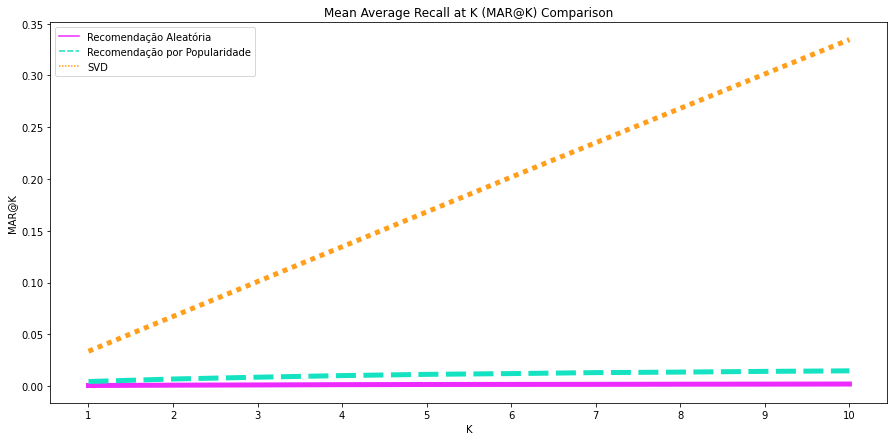

In [ ]:
mark_scores = [random_mark, pop_mark, svd_mark]
index = range(1,10 +1)
names = ['Recomendação Aleatória', 'Recomendação por Popularidade', 'SVD']

fig = plt.figure(figsize=(15, 7))
recmetrics.mark_plot(mark_scores, model_names=names, k_range=index)

## Coverage

É a porcentagem de itens que o recomendador pode recomendar. É apresentado pela seguinte fórmula:

$$ C = \dfrac{I}{N} \times 100  \%  $$

- **I**: Número de itens únicos que o modelo recomendou no conjunto de teste.

- **N**: Número total de itens únicos no conjunto de treino.

A covertura de catálogo é a taxa de itens distintos recomendados ao usuário por um período de tempo.

In [ ]:
catalog = ratings.movieId.unique().tolist()  
random_coverage = recmetrics.prediction_coverage(random_predictions, catalog)
pop_coverage = recmetrics.prediction_coverage(pop_predictions, catalog)
cf_coverage = recmetrics.prediction_coverage(svd, catalog)

## Catalog Coverage

In [ ]:
# N=100 observed recommendation lists
#random_cat_coverage = recmetrics.catalog_coverage(random_coverage, catalog, 100)
#pop_cat_coverage = recmetrics.catalog_coverage(pop_recs, catalog, 100)
#cf_cat_coverage = recmetrics.catalog_coverage(cf_recs, catalog, 100)

## Coverage Plot

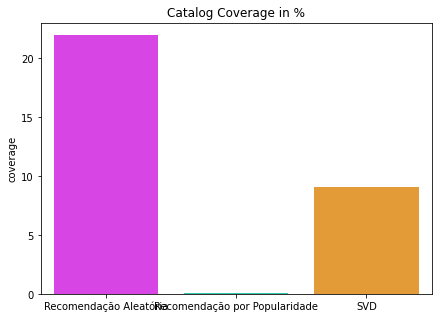

In [ ]:
# plot of prediction coverage
coverage_scores = [random_coverage, pop_coverage, cf_coverage]
model_names = ['Recomendação Aleatória', 'Recomendação por Popularidade', 'SVD']

fig = plt.figure(figsize=(7, 5))
recmetrics.coverage_plot(coverage_scores, model_names)

## Novelty
O índice de novidade mede a capacidade do modelo propor itens novos e inesperados que um usuário provavelmente não conhece.

Ela usa autoinformação do item recomendado e calcula a autoinformação média por lista dos $N$ princípais e faz a média de todos os usuários.

$$ novelty = \dfrac{1}{\mathbb{U}} \sum_{\overset{\forall u \in \mathbb{U}}{}}\sum_{\overset{\forall i \in topN}{}}\dfrac{log_2(\frac{count(i)}{|\mathbb{U}|})}{|N|} $$

- $|\mathbb{U}|$ : Número de usuários 
- Count(i) : Número de usuários que consumiram determinado item i
- $|N|$: Tamanho da lista recomendada

In [ ]:
nov = ratings.movieId.value_counts()
pop = dict(nov)

In [ ]:
random_novelty,random_mselfinfo_list = recmetrics.novelty(random_predictions, pop, len(users), 10)
pop_novelty,pop_mselfinfo_list = recmetrics.novelty(pop_recs, pop, len(users), 10)
cf_novelty,cf_mselfinfo_list = recmetrics.novelty(cf_recs, pop, len(users), 10)

In [ ]:
print(random_novelty, pop_novelty, cf_novelty)

3.853520866085095 0.838295578314479 2.333407404915733


## Personalization

A personalização mede a semelhança de recomendação entre os usuários (ele olha se as recomendações estão muito parecidas). 

- Uma alta pontuação indica que as recomendações do usuário são diferentes.

- Uma baixa pontuação indica que as recomendações são semelhantes.

Ex.:
 `example_predictions = [[A, B, C, D], [A, B, C, D]]`

A personalização para o exemplo acima é de 0.25 (i.e. 25%(1/4) das listas são diferentes)

Obs.: As listas tem que ser do mesmo tamanho!